In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\User\Downloads\What_I_have_to_know\Computer_Sciences\Data_Structure_and_Programming\I3\I3_S2\PDS\PDS_Final_Project\movieDataRemoved3.csv')

## <u><font color='turquoise'>**Data Cleaning/Preprocessing**</font></u>

In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection($)
0,4275,5,Some Kind of Beautiful,"Comedy,Romance",II 2014,99,11,****,****
1,163,2,Run Hide Fight,"Action,Crime,Drama",2020,109,13,****,****
2,1400,3,The Accidental Husband,"Comedy,Romance",2008,90,14,****,****
3,8567,3,The Layover,"Comedy,Romance",I 2017,88,15,****,****
4,5800,4,Sidney Hall,"Drama,Mystery,Romance",2017,119,18,****,****


In [4]:
# Replace **** with NaN
df.replace('****', np.nan, inplace=True)
df.head()

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection($)
0,4275,5,Some Kind of Beautiful,"Comedy,Romance",II 2014,99,11,NaN,NaN
1,163,2,Run Hide Fight,"Action,Crime,Drama",2020,109,13,NaN,NaN
2,1400,3,The Accidental Husband,"Comedy,Romance",2008,90,14,NaN,NaN
3,8567,3,The Layover,"Comedy,Romance",I 2017,88,15,NaN,NaN
4,5800,4,Sidney Hall,"Drama,Mystery,Romance",2017,119,18,NaN,NaN


In [185]:
df.tail()

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection($)
9831,6180,5,About Cherry,Drama,2012,98,33,"10,670",0
9832,6875,5,Vamps,"Comedy,Horror,Romance",2012,92,57,"10,482",0
9833,595,5,Death Defying Acts,"Drama,History,Romance",2007,97,48,"10,325",0
9834,310,5,Heartless,"Drama,Fantasy,Horror",I 2009,114,58,"10,260",0
9835,9197,3,The Samaritan,"Action,Crime,Drama",I 2012,90,37,"10,079",0


In [186]:
df = df.rename(columns={'Gross_Collection($)': 'Gross_Collection(M$)'})

In [187]:
df.head()

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$)
0,4275,5,Some Kind of Beautiful,"Comedy,Romance",II 2014,99,11,NaN,NaN
1,163,2,Run Hide Fight,"Action,Crime,Drama",2020,109,13,NaN,NaN
2,1400,3,The Accidental Husband,"Comedy,Romance",2008,90,14,NaN,NaN
3,8567,3,The Layover,"Comedy,Romance",I 2017,88,15,NaN,NaN
4,5800,4,Sidney Hall,"Drama,Mystery,Romance",2017,119,18,NaN,NaN


In [188]:
df['Year_of_Release']

0       II 2014
1          2020
2          2008
3        I 2017
4          2017
         ...   
9831       2012
9832       2012
9833       2007
9834     I 2009
9835     I 2012
Name: Year_of_Release, Length: 9836, dtype: object

### **Clean Year_of_Release values using elementary string operations**

In [189]:
def clean_year(year):
    if isinstance(year, int):
        return year
    year = str(year)
    if " " in year: 
        year = year.split(" ")[1]
    return int(year)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userID                9836 non-null   int64 
 1   userRating            9836 non-null   int64 
 2   Name_of_Movie         9836 non-null   object
 3   Genre                 9836 non-null   object
 4   Year_of_Release       9836 non-null   object
 5   Watch_time            9836 non-null   int64 
 6   Meta_Score            7868 non-null   object
 7   Votes                 7099 non-null   object
 8   Gross_Collection(M$)  7099 non-null   object
dtypes: int64(3), object(6)
memory usage: 691.7+ KB


In [191]:
df['Year_of_Release']

0       II 2014
1          2020
2          2008
3        I 2017
4          2017
         ...   
9831       2012
9832       2012
9833       2007
9834     I 2009
9835     I 2012
Name: Year_of_Release, Length: 9836, dtype: object

In [192]:
df['Year_of_Release'] = df['Year_of_Release'].apply(clean_year)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userID                9836 non-null   int64 
 1   userRating            9836 non-null   int64 
 2   Name_of_Movie         9836 non-null   object
 3   Genre                 9836 non-null   object
 4   Year_of_Release       9836 non-null   int64 
 5   Watch_time            9836 non-null   int64 
 6   Meta_Score            7868 non-null   object
 7   Votes                 7099 non-null   object
 8   Gross_Collection(M$)  7099 non-null   object
dtypes: int64(4), object(5)
memory usage: 691.7+ KB


### **Clean Votes values**

In [193]:
def clean_votes(vote):
    if isinstance(vote, str) or (isinstance(vote, float) and "," in str(vote)):
        V = str(vote).split(",")
        if len(V) == 1:
            return int(V[0])
        elif len(V) == 2:
            return int(V[0] + V[1])
        else:
            return int(V[0] + V[1] + V[2])
    return None


In [194]:
df

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$)
0,4275,5,Some Kind of Beautiful,"Comedy,Romance",2014,99,11,NaN,NaN
1,163,2,Run Hide Fight,"Action,Crime,Drama",2020,109,13,NaN,NaN
2,1400,3,The Accidental Husband,"Comedy,Romance",2008,90,14,NaN,NaN
3,8567,3,The Layover,"Comedy,Romance",2017,88,15,NaN,NaN
4,5800,4,Sidney Hall,"Drama,Mystery,Romance",2017,119,18,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9831,6180,5,About Cherry,Drama,2012,98,33,"10,670",0
9832,6875,5,Vamps,"Comedy,Horror,Romance",2012,92,57,"10,482",0
9833,595,5,Death Defying Acts,"Drama,History,Romance",2007,97,48,"10,325",0
9834,310,5,Heartless,"Drama,Fantasy,Horror",2009,114,58,"10,260",0


In [195]:
df['Votes'] = df['Votes'].apply(clean_votes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userID                9836 non-null   int64  
 1   userRating            9836 non-null   int64  
 2   Name_of_Movie         9836 non-null   object 
 3   Genre                 9836 non-null   object 
 4   Year_of_Release       9836 non-null   int64  
 5   Watch_time            9836 non-null   int64  
 6   Meta_Score            7868 non-null   object 
 7   Votes                 7099 non-null   float64
 8   Gross_Collection(M$)  7099 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 691.7+ KB


In [196]:
df['Votes'] = df['Votes'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userID                9836 non-null   int64 
 1   userRating            9836 non-null   int64 
 2   Name_of_Movie         9836 non-null   object
 3   Genre                 9836 non-null   object
 4   Year_of_Release       9836 non-null   int64 
 5   Watch_time            9836 non-null   int64 
 6   Meta_Score            7868 non-null   object
 7   Votes                 7099 non-null   Int64 
 8   Gross_Collection(M$)  7099 non-null   object
dtypes: Int64(1), int64(4), object(4)
memory usage: 701.3+ KB


### Careful over here....I used "Int64". The difference between "Int64" and "int64" is that "Int64" can handle null/missing values. Took quite a while to get to this part!! 

Now on to the next part on Meta_Score

In [197]:
df['Meta_Score'] = df['Meta_Score'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userID                9836 non-null   int64 
 1   userRating            9836 non-null   int64 
 2   Name_of_Movie         9836 non-null   object
 3   Genre                 9836 non-null   object
 4   Year_of_Release       9836 non-null   int64 
 5   Watch_time            9836 non-null   int64 
 6   Meta_Score            7868 non-null   Int64 
 7   Votes                 7099 non-null   Int64 
 8   Gross_Collection(M$)  7099 non-null   object
dtypes: Int64(2), int64(4), object(3)
memory usage: 710.9+ KB


### **Gross Collection**

In [198]:
# Replace any non-numeric characters with an empty string
df['Gross_Collection(M$)'] = df['Gross_Collection(M$)'].str.replace('[^0-9.]', '')

# Convert the column to float64
df['Gross_Collection(M$)'] = df['Gross_Collection(M$)'].astype('float64')

C:\Users\User\AppData\Local\Temp\ipykernel_16460\3633826942.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Gross_Collection(M$)'] = df['Gross_Collection(M$)'].str.replace('[^0-9.]', '')


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userID                9836 non-null   int64  
 1   userRating            9836 non-null   int64  
 2   Name_of_Movie         9836 non-null   object 
 3   Genre                 9836 non-null   object 
 4   Year_of_Release       9836 non-null   int64  
 5   Watch_time            9836 non-null   int64  
 6   Meta_Score            7868 non-null   Int64  
 7   Votes                 7099 non-null   Int64  
 8   Gross_Collection(M$)  7099 non-null   float64
dtypes: Int64(2), float64(1), int64(4), object(2)
memory usage: 710.9+ KB


### **Analysis on missing/null values**

 Now we will check for any missing values in our dataset. We check for any rows whose features' values contain `NaN`. Even if one of the movie's feature contains `Nan`, we will also include that into our "num_missing_rows" variables.

In [200]:
# count the number of rows with at least one missing value
missing_rows = df.isna().any(axis=1).sum()

# count the number of rows without missing values
non_missing_rows = len(df) - missing_rows

In [201]:
missing_rows

3351

**3351** rows with Nan in at least one of its features??, that's a lot. So how does that compare to the whole data set?, in percentage....

In [202]:
percentage_missing_values = missing_rows/len(df) * 100
print(f"Percentage of missing values with respect to the whole data set: {percentage_missing_values} %")

Percentage of missing values with respect to the whole data set: 34.0687271248475 %


### A walloping <font color='red'>34</font> %!! of our entire dataset contains missing values.....

Now let's try to visualize it...what does it look like compared to the whole set

In [203]:
# plot the results as a pie chart
labels = ['Rows with missing values', 'Rows without missing values']
sizes = [missing_rows, non_missing_rows]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

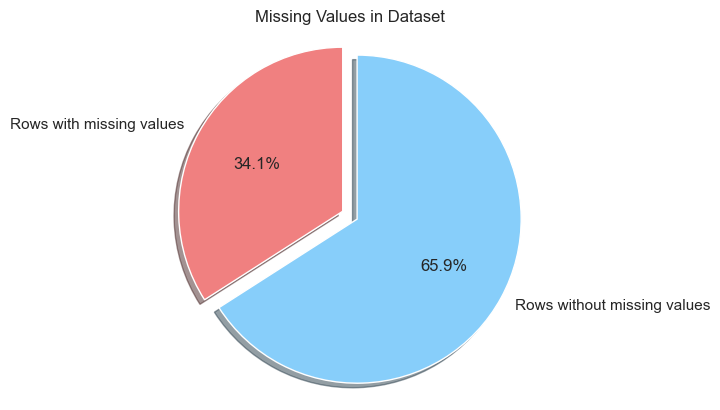

In [204]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Missing Values in Dataset')
plt.show()

### **Analysing missing values column-wise or feature-wise**

In [205]:
# create a boolean mask for rows with missing data
missing_mask = df.isna()
# find the number of rows with missing data
num_missing_rows = missing_mask.sum()

# print the number of rows with missing data
print(f"Number of rows with missing data: \n{num_missing_rows}")

Number of rows with missing data: 
userID                     0
userRating                 0
Name_of_Movie              0
Genre                      0
Year_of_Release            0
Watch_time                 0
Meta_Score              1968
Votes                   2737
Gross_Collection(M$)    2737
dtype: int64


In [206]:
percentage_missing_values = num_missing_rows/len(df) * 100
print(f"Percentage(%) of missing values with respect to the whole data set: \n{percentage_missing_values} %")

Percentage(%) of missing values with respect to the whole data set: 
userID                   0.000000
userRating               0.000000
Name_of_Movie            0.000000
Genre                    0.000000
Year_of_Release          0.000000
Watch_time               0.000000
Meta_Score              20.008133
Votes                   27.826352
Gross_Collection(M$)    27.826352
dtype: float64 %


### **A bar chart/distribution to visualize the frequency of missing values across our dataset**

In [207]:
# Count the number of missing values in each column
missing_data = df.isnull().sum()
columns = df.columns.tolist()

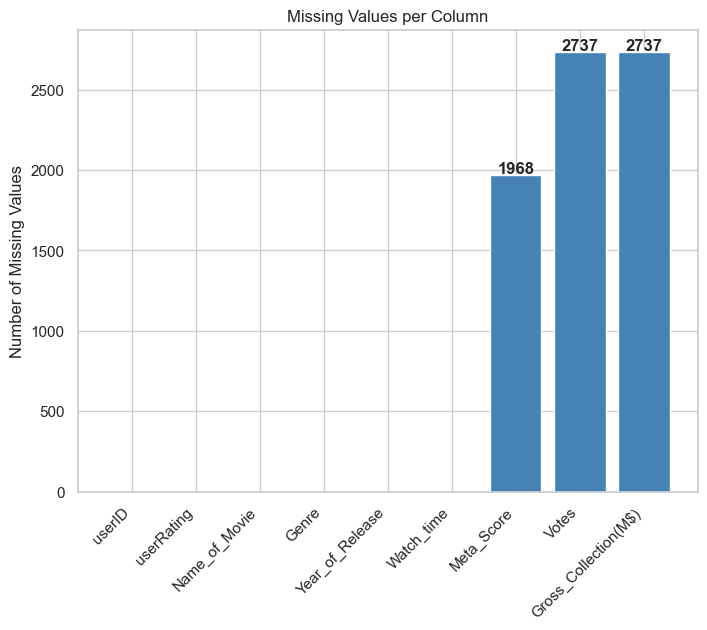

In [208]:
# count the number of missing values in each column
missing_values_count = df.isnull().sum()

# create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(missing_values_count.index, missing_values_count.values, color='skyblue')

# add labels and title
ax.bar(columns, missing_data, color='steelblue')
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=45, ha='right')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Missing Values per Column')

# add missing value count on top of each bar
for i, v in enumerate(missing_values_count.values):
    if v > 0:
        ax.text(i, v+10, str(v), horizontalalignment='center', fontweight='bold')


plt.tight_layout
# show the plot
plt.show()

As we can see so far, there are $34$ % of the entire movies that contain missing values in at least one of its features....that is a lot. And column-wise we have $20.008133$% of movies which do have missing meta scores and $27.826352$ % of movies which have no gross collection and votes. That is a quarter of all our data set, removing those movies will heavily impact the data analysis of the features' distrbution. Moreover, we cannot just ignore missing values. So, we will resort to imputing them with either the mean, median or the mode. Here is a brief overview of when to impute missing values with the mean and median and the mode:


1. Mean: The mean is a good choice for imputing missing values when the data is normally distributed or approximately symmetric. However, if the data has extreme outliers or is skewed, the mean may not be the best choice as it can be heavily influenced by these outliers. In such cases, you may want to consider using the median instead.

2. Median: The median is a good choice for imputing missing values when the data is skewed or has extreme outliers. Since the median is not affected by extreme values, it can provide a more robust estimate of the central tendency of the data. However, if the data is symmetric and not too heavily skewed, the mean may be a better choice.

3. Mode: The mode is a good choice for imputing missing values when the data is categorical or discrete. For example, if you have a dataset of eye colors and some values are missing, you can impute the missing values with the mode (i.e., the most frequent eye color). However, if the data is continuous or numerical, the mean or median may be more appropriate.

So to know which one, let's plot the data distributions of the movies' Meta Score, Votes, and Gross Collection($). Firstly, it is obvious that since the 3 mentioned features are numerical, then imputing their instances with the `mode` is not logical so `mode` is out of the option leaving only median and mean.

In [209]:
def hist_plotter(feature, dataframe):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(dataframe, kde=False, ax=ax, color='steelblue')
    ax.set_title("Histogram of " + feature, fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.tick_params(labelsize=12)
    plt.show()

In [210]:
Votes_non_null = df.loc[df['Votes'].notnull(), 'Votes'].copy()
Meta_Score_non_null = df.loc[df['Meta_Score'].notnull(), 'Meta_Score'].copy()
Gross_non_null = df.loc[df['Gross_Collection(M$)'].notnull(), 'Gross_Collection(M$)'].copy()


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


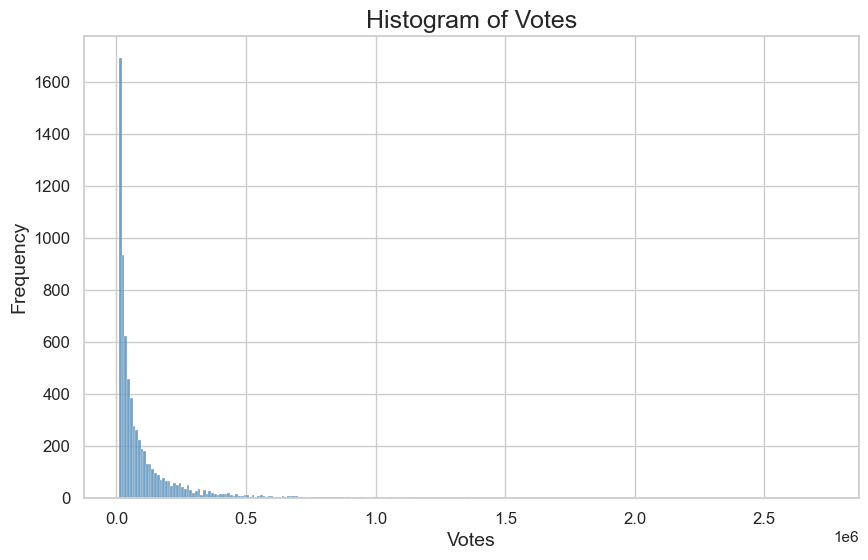

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


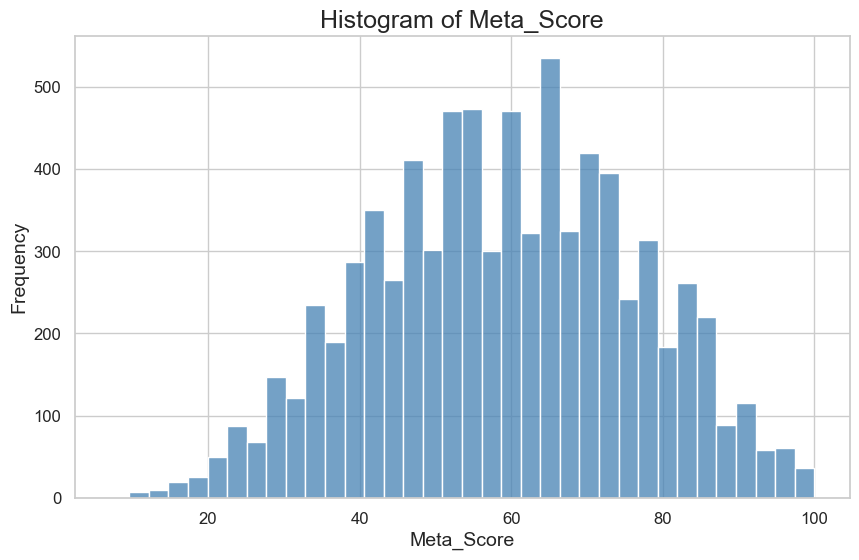

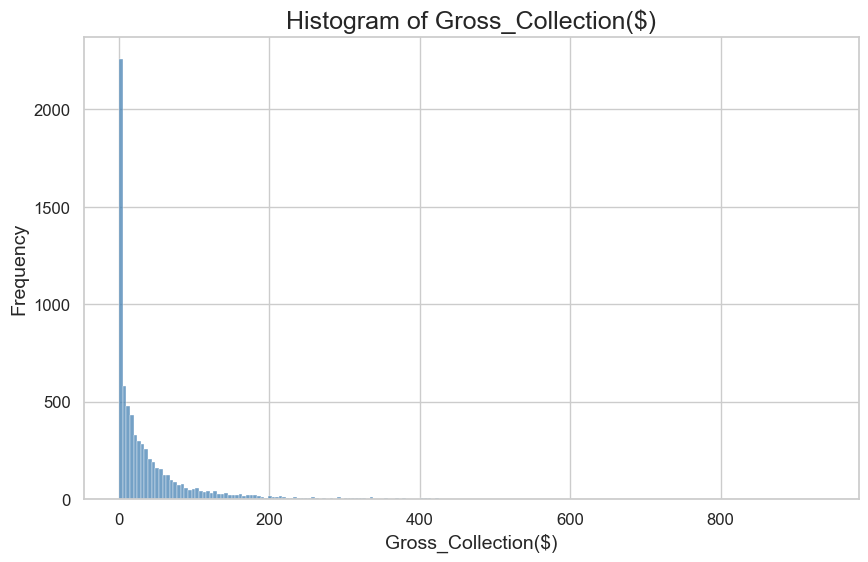

In [211]:
series_list = [Votes_non_null, Meta_Score_non_null, Gross_non_null]
FEATURES = ['Votes', 'Meta_Score', 'Gross_Collection($)']
for series_, feature in zip(series_list, FEATURES):
    hist_plotter(feature, series_)

In [212]:
from scipy.stats import skew

In [213]:
def hist_with_sqrt_transform(series):
    # make a copy of the series and cast to float64
    series_copy = series.copy().astype(np.float64)

    # apply the square root transformation
    series_sqrt = np.sqrt(series_copy)

    # compute skewness for both series
    skewness_original = skew(series_copy)
    skewness_sqrt = skew(series_sqrt)

    # plot histograms of the original and transformed series
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.histplot(series_copy, kde=True, ax=axs[0], color='steelblue')
    sns.histplot(series_sqrt, kde=True, ax=axs[1], color='steelblue')

    # add skewness to the plots
    axs[0].text(0.95, 0.95, f'Skewness: {skewness_original:.2f}', ha='right', va='top', transform=axs[0].transAxes)
    axs[1].text(0.95, 0.95, f'Skewness: {skewness_sqrt:.2f}', ha='right', va='top', transform=axs[1].transAxes)

    # set titles for the plots
    axs[0].set(title='Histogram of Original Series')
    axs[1].set(title='Histogram of Square Root Transformed Series')

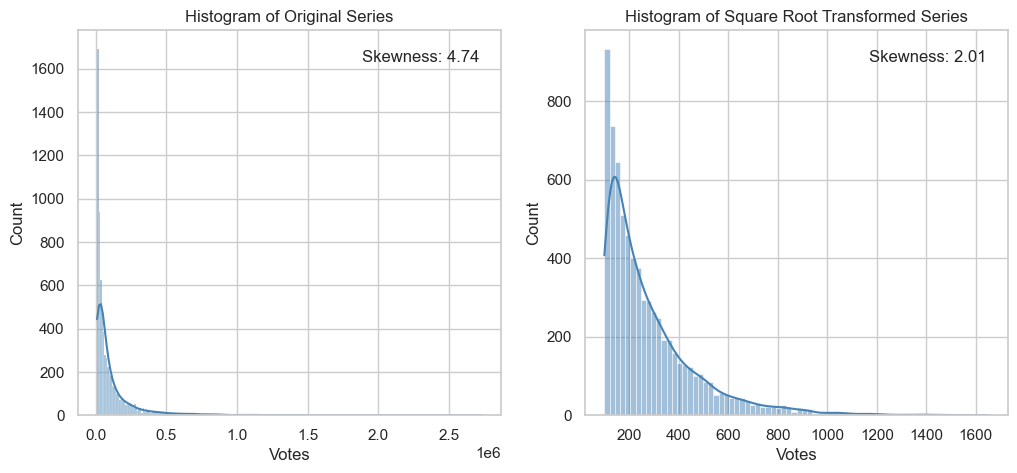

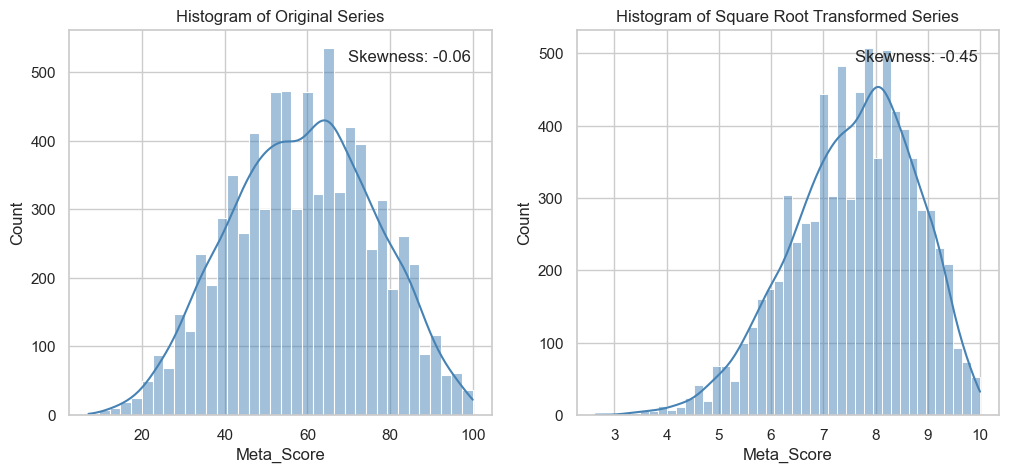

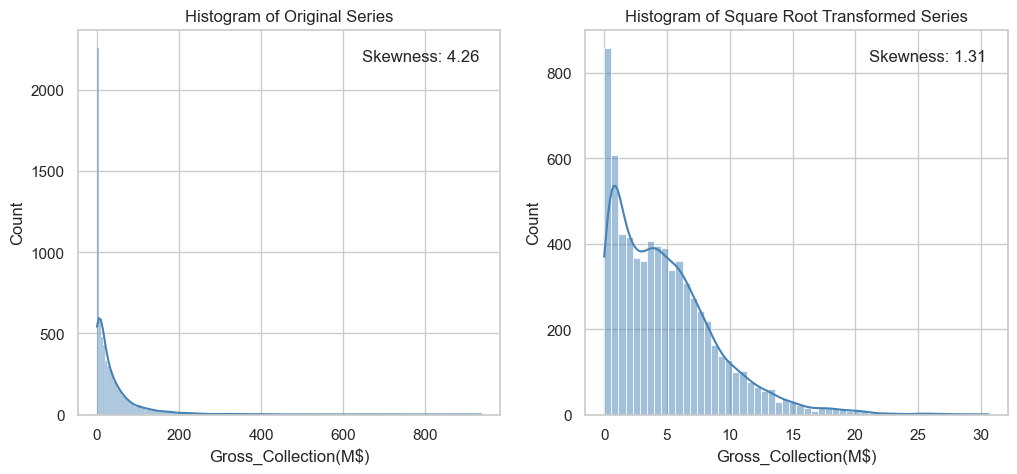

In [214]:
for series in series_list:
    hist_with_sqrt_transform(series)

In [215]:
def hist_with_log_transform(series, constant=1e-6):
    # make a copy of the series
    series_copy = series.copy().astype(np.float64)

    # add constant to the series before taking the log transformation
    series_copy[series_copy == 0] = constant

    # apply the log transformation
    series_log = np.log(series_copy)

    # compute skewness for both series
    skewness_original = skew(series_copy)
    skewness_log = skew(series_log)

    # plot histograms of the original and transformed series
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.histplot(series_copy, kde=True, ax=axs[0], color='steelblue')
    sns.histplot(series_log, kde=True, ax=axs[1], color='steelblue')

    # add skewness to the plots
    axs[0].text(0.95, 0.95, f'Skewness: {skewness_original:.2f}', ha='right', va='top', transform=axs[0].transAxes)
    axs[1].text(0.95, 0.95, f'Skewness: {skewness_log:.2f}', ha='right', va='top', transform=axs[1].transAxes)

    # set titles for the plots
    axs[0].set(title='Histogram of Original Series')
    axs[1].set(title='Histogram of Log Transformed Series')



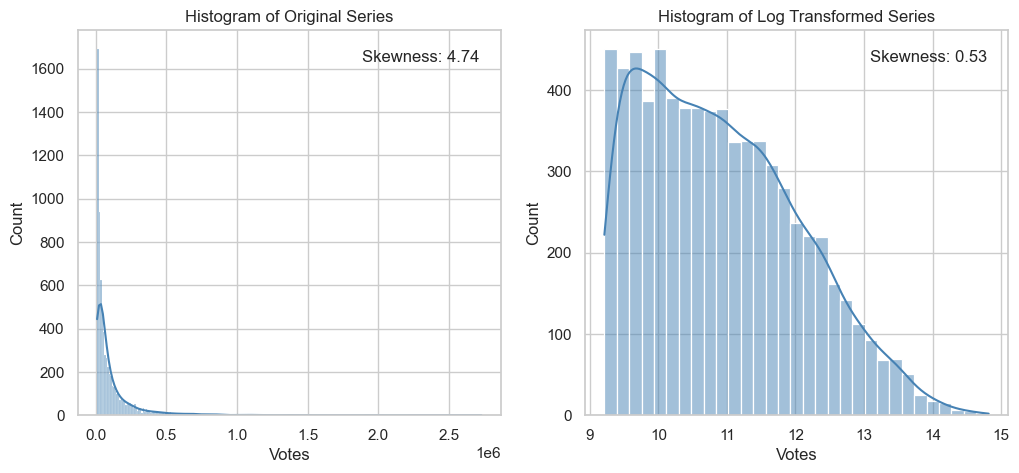

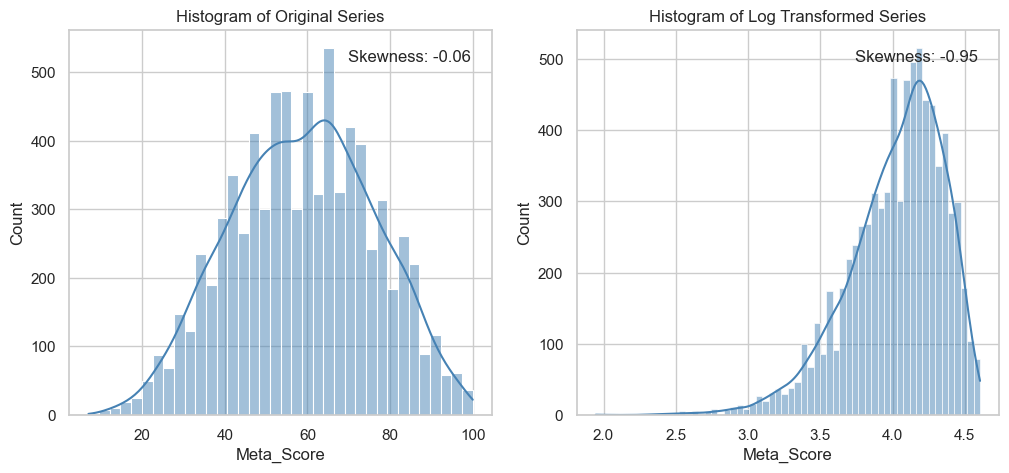

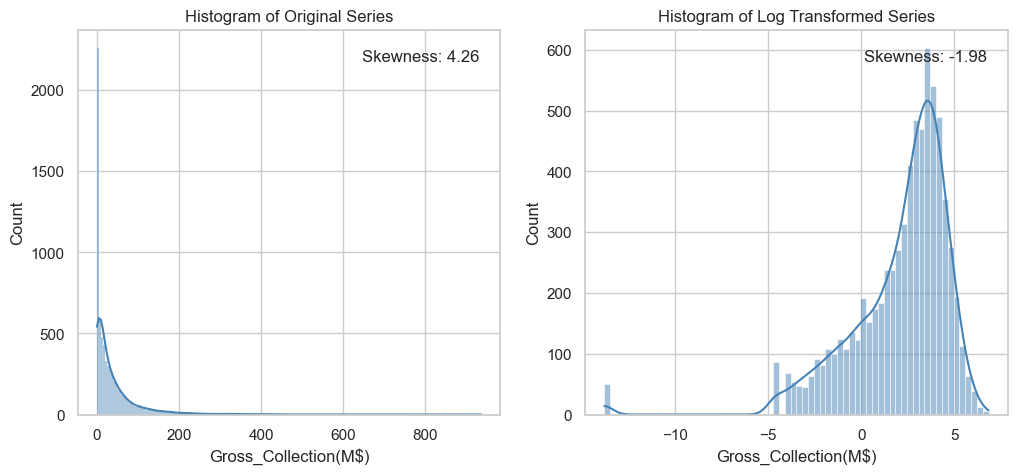

In [216]:
for series in series_list:
    hist_with_log_transform(series)

### Although the skewness has gotten better, we believe that working with the transformed data will bring more challenges such as :

- transformed variables are sometimes harder to interpret
- if the measure is commonly known and understood, such as sales dollars, the multiplicative inverse of sales dollars can be harder to interpret and communicate
- making meaningful predictions often means inverting the transformed variables back to the original form. 
- sometimes, selecting the best transformation can be a process of trial and error.
- transformations can sometimes overshoot the goal and create issues in the other direction; must verify and recheck
- grouped data, values that are zero/neg required additional steps
- can risk unintended consequences in variable relationships


**However, all those works are not useless. One inference that we can take from the above is that for Meta_Score, we can impute the NaN values with the mean and for Votes and Gross_Collection($), we can impute their values with the median due to their relentless skewness.**

**Computing the mean of meta scores**

In [217]:
meta_score_mean = int(np.ceil(Meta_Score_non_null.mean()))
meta_score_mean

59

**Computing the median of Votes and Gross_Collection($)**

In [218]:
votes_median = int(Votes_non_null.median())
votes_median

47591

In [219]:
gross_median = Gross_non_null.median()
gross_median

16.94

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userID                9836 non-null   int64  
 1   userRating            9836 non-null   int64  
 2   Name_of_Movie         9836 non-null   object 
 3   Genre                 9836 non-null   object 
 4   Year_of_Release       9836 non-null   int64  
 5   Watch_time            9836 non-null   int64  
 6   Meta_Score            7868 non-null   Int64  
 7   Votes                 7099 non-null   Int64  
 8   Gross_Collection(M$)  7099 non-null   float64
dtypes: Int64(2), float64(1), int64(4), object(2)
memory usage: 710.9+ KB


**Let's impute!**

In [221]:
df['Meta_Score'] = df['Meta_Score'].fillna(meta_score_mean)
df['Votes'] = df['Votes'].fillna(votes_median)
df['Gross_Collection(M$)'] = df['Gross_Collection(M$)'].fillna(gross_median)

In [222]:
new_df = df[['Meta_Score', 'Gross_Collection(M$)', 'Votes']]
new_df.head()


,Meta_Score,Gross_Collection(M$),Votes
0,11,16.94,47591
1,13,16.94,47591
2,14,16.94,47591
3,15,16.94,47591
4,18,16.94,47591


#### Our temporary analysis on the missing values end here....but we will come back to this later if needed (:

#### Summary Statistics(for numerical features only)

In [223]:
df.describe().astype(int)

,userID,userRating,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$)
count,9836,9836,9836,9836,9836,9836,9836
mean,4918,3,2001,110,58,95930,33
std,2839,1,18,22,15,165312,58
min,1,1,1915,45,7,10001,0
25%,2459,2,1994,96,50,28497,6
50%,4918,3,2006,106,59,47591,16
75%,7377,4,2014,120,68,83283,33
max,9836,5,2023,439,100,2728085,936


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userID                9836 non-null   int64  
 1   userRating            9836 non-null   int64  
 2   Name_of_Movie         9836 non-null   object 
 3   Genre                 9836 non-null   object 
 4   Year_of_Release       9836 non-null   int64  
 5   Watch_time            9836 non-null   int64  
 6   Meta_Score            9836 non-null   Int64  
 7   Votes                 9836 non-null   Int64  
 8   Gross_Collection(M$)  9836 non-null   float64
dtypes: Int64(2), float64(1), int64(4), object(2)
memory usage: 710.9+ KB


In [224]:
df.head()

,userID,userRating,Name_of_Movie,Genre,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$)
0,4275,5,Some Kind of Beautiful,"Comedy,Romance",2014,99,11,47591,16.94
1,163,2,Run Hide Fight,"Action,Crime,Drama",2020,109,13,47591,16.94
2,1400,3,The Accidental Husband,"Comedy,Romance",2008,90,14,47591,16.94
3,8567,3,The Layover,"Comedy,Romance",2017,88,15,47591,16.94
4,5800,4,Sidney Hall,"Drama,Mystery,Romance",2017,119,18,47591,16.94


### **Handling outliers**

In [78]:
def b_plot(c):
    # create a boxplot for the 'Gross_Collection($)' column
    plt.boxplot(df[c], vert=False, whis=1.5, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

    # set title and axis labels
    plt.title(f'Boxplot of {c}')
    plt.xlabel(c)

    # display the plot
    plt.show()

In [80]:
columns = ['userRating', 'Year_of_Release', 'Watch_time', 'Meta_Score', 'Votes', 'Gross_Collection(M$)']

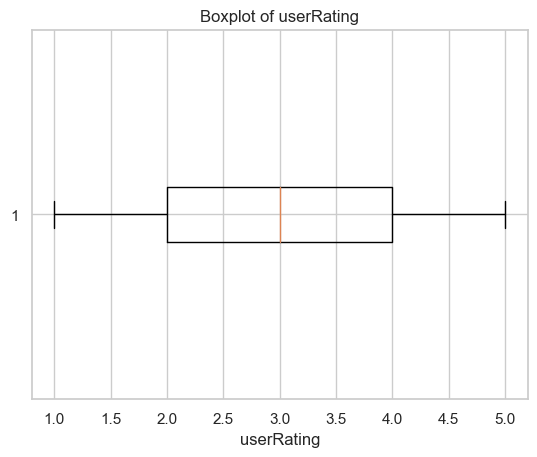

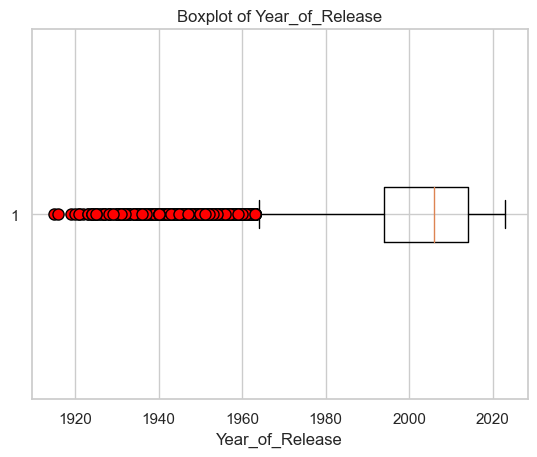

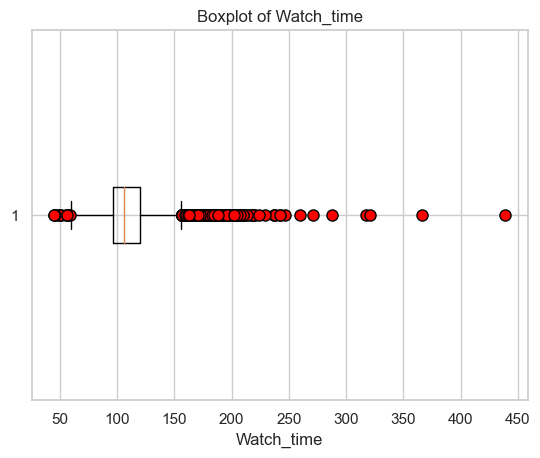

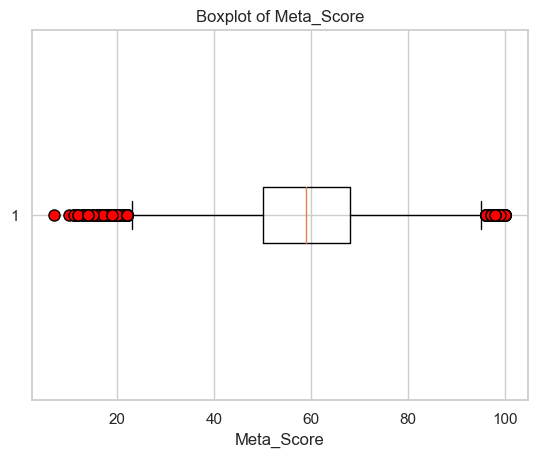

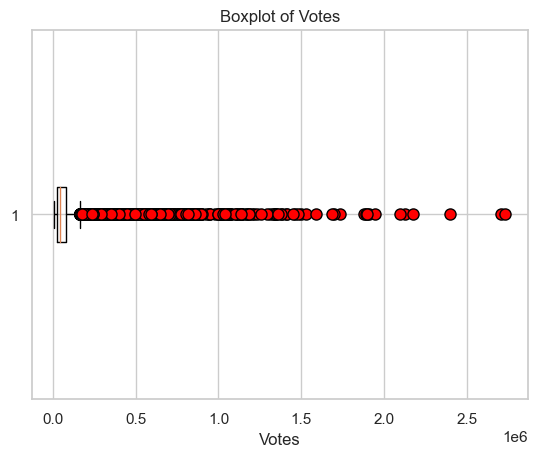

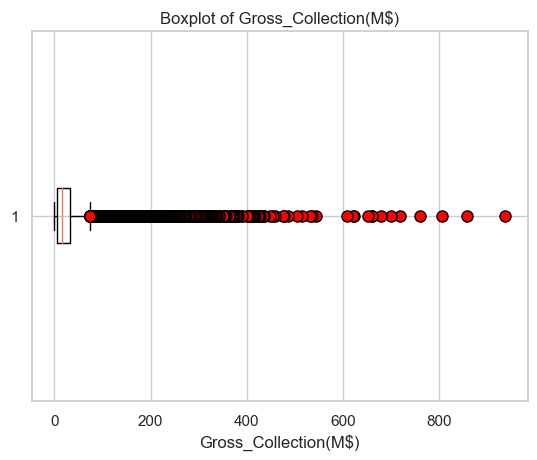

In [81]:
for col in columns:
    b_plot(col)

In [82]:

def detect_outliers(data_f):
    '''
    Detect outliers of each feature in a Pandas DataFrame and group them into a dictionary of
    outliers for each column in the DataFrame.

    Parameters:
        df (pandas.DataFrame): A pandas DataFrame that contains the data.

    Returns:
        dict: A dictionary of outliers for each column in the DataFrame.
    '''
    outliers_dict = {}
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    newdf_ = data_f.select_dtypes(include=numerics)
    for col in newdf_.columns:
        Q1 = newdf_[col].quantile(0.25)
        Q3 = newdf_[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
        outliers_dict[col] = outliers_col
    return outliers_dict


In [83]:
X = detect_outliers(df)

In [84]:
for c, i in X.items():
    print(f"{c} -> {len(i)}")

userID -> 0
userRating -> 0
Year_of_Release -> 567
Watch_time -> 417
Meta_Score -> 190
Votes -> 1312
Gross_Collection(M$) -> 1104


In [85]:
def plot_outlier_histograms(outliers_dic):
    '''
    Plot histograms of outliers for each column in a Pandas DataFrame.

    Parameters:
        outliers_dict (dict): A dictionary of outliers for each column in the DataFrame.
    '''
    for col, outliers in outliers_dic.items():
        if len(outliers) > 0:
            fig, ax = plt.subplots()
            ax.hist(outliers)
            ax.set_title(f"Histogram of Outliers for {col}")
            plt.show()


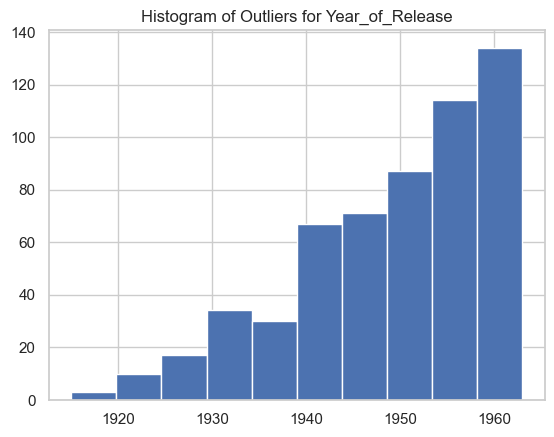

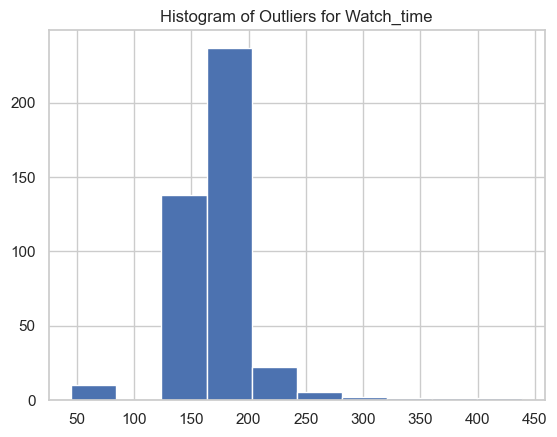

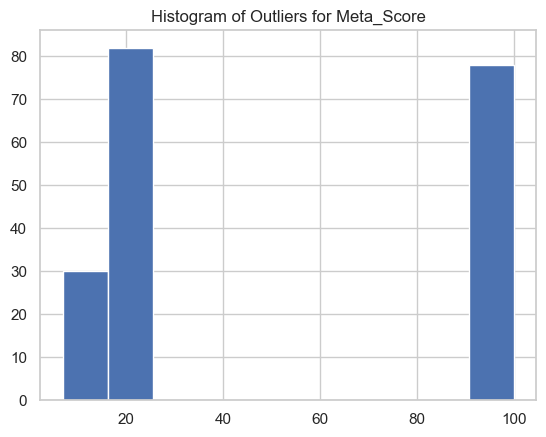

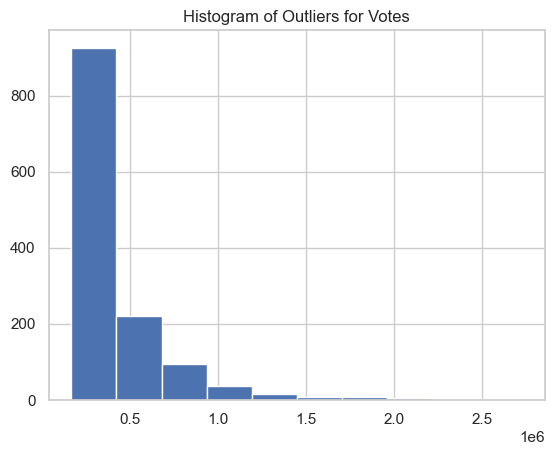

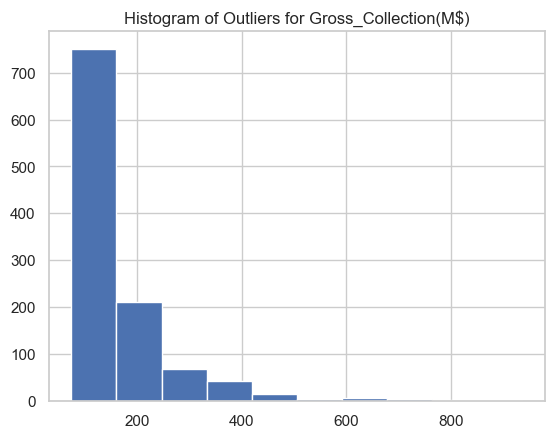

In [86]:
plot_outlier_histograms(X)

### That was a lot!!! So how do we actually handle the outliers?


Firstly, as Professor Sokkhey told us....in data science, there is not a one-size-fits-all method. That still holds in our case. So here are our ideas on why the above outliers occurred:
- Data entry error: data entered correctly or the IMDb's system malfunctioned.  
- Sampling error: data that we scraped may be representatives and contain biases since IMDb websites like all other movie press machines have their own biases with movie reviews.
- Jerks: there might have been people entering the data too quickly and bots might have been used although this option is not probable but not impossible.

- The following are the only columns that are worth notetaking when analysing the outliers: they are the Votes and the Meta Scores which were generated by IMDb's sites goers, in terms of biases. All the other features such as the Year of Release, the Gross Collection and the Watch Time values may be, but not probable, considered as outliers, in terms of sampling and data entry errors...etc.


<font color='red'>All in all,</font>

**All of these, we will check later throughout the project so any outliers are not removed. yet for the time being. It's just that for now, we will perform another data cleaning process and then move on to the other stages.**

# <u>**3. Feature Engineering + EDA**</u>

In [87]:
def create_genre_df(dataframe):
    # create a list of unique genres
    genres = set()
    for genre_list in dataframe['Genre']:
        genres.update(genre_list.split(','))

    # create a dictionary with the movies and their genres
    genre_dict = {}
    for index, row in dataframe.iterrows():
        for genre in row['Genre'].split(','):
            if genre not in genre_dict:
                genre_dict[genre] = []
            genre_dict[genre].append(row['Name_of_Movie'])

    # create the DataFrame
    df_genre = pd.DataFrame.from_dict(genre_dict, orient='index')
    df_genre = df_genre.transpose()

    return df_genre



In [88]:
create_genre_df(df)

,Comedy,Romance,Action,Crime,Drama,Mystery,Adventure,Thriller,Horror,Biography,...,Sport,Family,War,History,Music,Musical,Animation,Western,Film-Noir,Adult
0,Some Kind of Beautiful,Some Kind of Beautiful,Run Hide Fight,Run Hide Fight,Run Hide Fight,Sidney Hall,The Ridiculous 6,Momentum,Day of the Woman,Grace of Monaco,...,Home Team,Playing with Fire,The Ottoman Lieutenant,The Professor and the Madman,Purple Hearts,Dear Evan Hansen,Blood: The Last Vampire,Joe Kidd,Dark Passage,Showgirls
1,The Accidental Husband,The Accidental Husband,The Ridiculous 6,Momentum,Sidney Hall,The Car,The Do-Over,Polar,The Sentinel,The Professor and the Madman,...,Le grand bain,The War with Grandpa,Man Down,Last Knights,I Still Believe,The Prom,The Super Mario Bros. Movie,Forsaken,The Naked City,None
2,The Layover,The Layover,Momentum,Reasonable Doubt,Reasonable Doubt,Pay the Ghost,Cannibal Holocaust,Day of the Woman,Would You Rather,Billionaire Boys Club,...,Goon: Last of the Enforcers,The Royal Treatment,Without Remorse,USS Indianapolis: Men of Courage,Fisherman's Friends,Spirited,Hotel Transylvania: Transformania,Support Your Local Sheriff!,Gun Crazy,None
3,The Ridiculous 6,Sidney Hall,Polar,Home Sweet Hell,A Family Man,Happy Birthday to Me,Welcome to the Jungle,Reasonable Doubt,The Car,Colonia,...,Bruised,La belle et la bête,Force 10 from Navarone,Black Gold,Eurovision Song Contest: The Story of Fire Saga,Cyrano,Luck,The Big Country,Nightmare Alley,None
4,The Angriest Man in Brooklyn,Grace of Monaco,The Car,The Tax Collector,Grace of Monaco,Misconduct,Sap ji sang ciu,Would You Rather,The Babysitter: Killer Queen,Brain on Fire,...,American Underdog,St. Trinian's,Sand Castle,Colonia,Studio 666,Annette,Disenchanted,McLintock!,The Stranger,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,None,None,None,None,Jerusalema,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5747,None,None,None,None,About Cherry,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5748,None,None,None,None,Death Defying Acts,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5749,None,None,None,None,Heartless,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [248]:
def one_hot_encode_genre(df_p):
    dataframe = df_p.copy()
    # create a list of all unique genres
    unique_genres = set()
    for genres in dataframe['Genre']:
        if pd.isna(genres):
            continue
        unique_genres.update(genres.split(','))
    unique_genres = sorted(list(unique_genres))
    
    # create a dictionary to map genres to their respective index
    genre_to_index = {genre: i for i, genre in enumerate(unique_genres)}
    
    # create a numpy array with one row for each movie and one column for each genre
    one_hot_encoded = np.zeros((len(dataframe), len(unique_genres)), dtype=int)
    
    # loop through each movie and set the appropriate genre columns to 1
    for i, genres in enumerate(dataframe['Genre']):
        if pd.isna(genres):
            continue
        for genre in genres.split(','):
            one_hot_encoded[i][genre_to_index[genre]] = 1
    
    # create a new dataframe with the one-hot-encoded genres
    genre_df = pd.DataFrame(one_hot_encoded, columns=unique_genres)
    
    # add the new genre columns to the original dataframe
    dataframe = pd.concat([dataframe, genre_df], axis=1)
    
    # drop the original "Genre" column
    dataframe = dataframe.drop('Genre', axis=1)
    
    return dataframe

In <font color='red'>one-hot encoding</font>, each unique value in a categorical variable is transformed into a binary vector where each vector has a 1 in the position corresponding to the original value and 0s in all other positions. This technique helps to avoid assigning any arbitrary ordering to categorical variables and allows machine learning models to interpret the categories as <u>**<font color='green'>independent</font>**</u> features.

In [249]:
encoded_data = one_hot_encode_genre(df)
encoded_data

,userID,userRating,Name_of_Movie,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$),Action,Adult,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,4275,5,Some Kind of Beautiful,2014,99,11,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
1,163,2,Run Hide Fight,2020,109,13,47591,16.94,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1400,3,The Accidental Husband,2008,90,14,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8567,3,The Layover,2017,88,15,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5800,4,Sidney Hall,2017,119,18,47591,16.94,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,6180,5,About Cherry,2012,98,33,10670,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,6875,5,Vamps,2012,92,57,10482,0.00,0,0,...,1,0,0,0,1,0,0,0,0,0
9833,595,5,Death Defying Acts,2007,97,48,10325,0.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9834,310,5,Heartless,2009,114,58,10260,0.00,0,0,...,1,0,0,0,0,0,0,0,0,0


In [250]:
encoded_data.iloc[:, 9:]

,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9833,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9834,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [251]:
encoded_data.head()

,userID,userRating,Name_of_Movie,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$),Action,Adult,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,4275,5,Some Kind of Beautiful,2014,99,11,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
1,163,2,Run Hide Fight,2020,109,13,47591,16.94,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1400,3,The Accidental Husband,2008,90,14,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8567,3,The Layover,2017,88,15,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5800,4,Sidney Hall,2017,119,18,47591,16.94,0,0,...,0,0,0,1,1,0,0,0,0,0


# <font color='red'>**Please start here**</font>

In [4]:
encoded_data = pd.read_csv("encoded_clean_1.csv")
encoded_data.head()

,Unnamed: 0,userID,userRating,Name_of_Movie,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$),Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,4275,5,Some Kind of Beautiful,2014,99,11,47591,16.94,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,163,2,Run Hide Fight,2020,109,13,47591,16.94,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1400,3,The Accidental Husband,2008,90,14,47591,16.94,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,8567,3,The Layover,2017,88,15,47591,16.94,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,5800,4,Sidney Hall,2017,119,18,47591,16.94,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


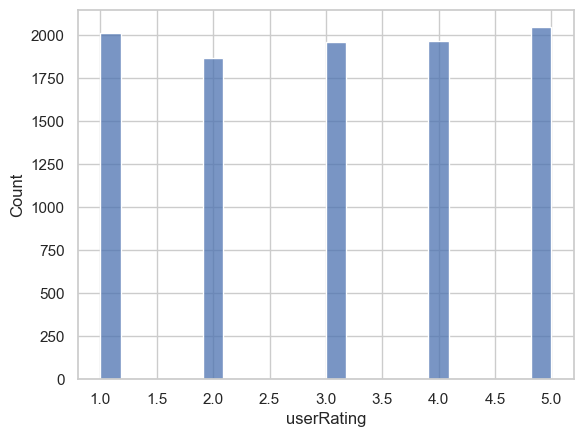

In [104]:
sns.histplot(encoded_data['userRating'])
plt.show()

From the look of the histogram, it can be argued that the distribution of the userRating colum values is **$Uniform$** as expected because we use the **randbetween(start, end, step, )** which uniformly and randomly generated the userRating column values.

### Box plot

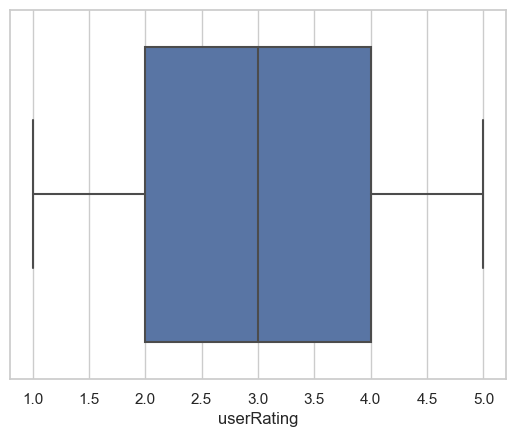

In [94]:
sns.boxplot(x='userRating', data=encoded_data)
plt.show()

### Let's have a look at the relationship between userRating and the movie Votes from IMDb.

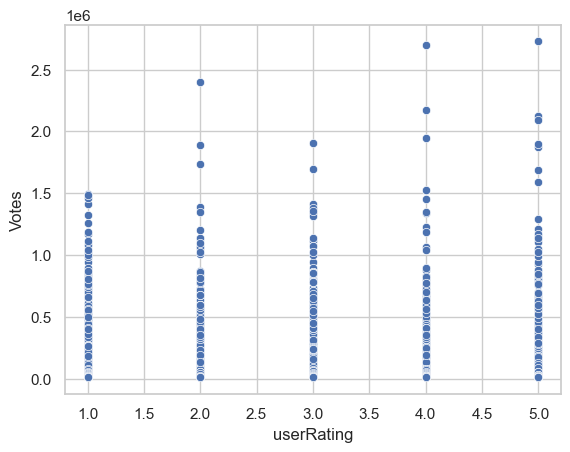

In [105]:
sns.scatterplot(x='userRating', y='Votes', data=encoded_data)
plt.show()

### Correlation matrix to identify the strength and direction of the relationship between numerical variables in our dataset

In [106]:
corr_matrix = encoded_data.corr(numeric_only=True)
corr_matrix

,userID,userRating,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$),Action,Adult,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
userID,1.000000,-0.002271,-0.008649,-0.016726,-0.000226,-0.016659,-0.026293,-0.000209,0.002804,-0.014827,...,-0.010432,-0.007930,-0.012548,0.004755,0.011708,0.002087,0.018775,-0.003067,0.003669,-0.016832
userRating,-0.002271,1.000000,0.000252,0.003529,0.014277,0.008888,0.002306,0.004497,-0.000121,-0.014557,...,0.005134,0.008220,0.006126,0.003793,0.002870,-0.001592,0.004303,-0.017413,-0.001859,-0.009206
Year_of_Release,-0.008649,0.000252,1.000000,0.046473,-0.202076,0.056684,0.076926,0.123435,-0.003395,0.022257,...,0.014797,-0.000050,-0.086540,0.029878,-0.051871,-0.003138,0.016918,0.046164,-0.097184,-0.123608
Watch_time,-0.016726,0.003529,0.046473,1.000000,0.178003,0.189624,0.128572,0.124735,0.007927,0.000018,...,-0.204103,0.009791,0.095162,-0.047153,0.024722,-0.021956,0.038214,-0.032764,0.085960,0.033044
Meta_Score,-0.000226,0.014277,-0.202076,0.178003,1.000000,0.196494,0.034351,-0.159673,-0.025255,-0.033115,...,-0.095048,0.034576,0.035056,-0.022173,-0.014453,-0.044774,-0.023578,-0.065592,0.066249,0.055498
Votes,-0.016659,0.008888,0.056684,0.189624,0.196494,1.000000,0.625263,0.138390,-0.001563,0.167107,...,-0.044927,-0.032467,-0.023087,0.003922,-0.082054,0.147476,-0.021398,0.005427,-0.008945,-0.011115
Gross_Collection(M$),-0.026293,0.002306,0.076926,0.128572,0.034351,0.625263,1.000000,0.179453,-0.002325,0.311687,...,-0.067751,-0.027958,-0.014181,-0.047579,-0.073220,0.121313,-0.005295,-0.034576,-0.036124,-0.019422
Action,-0.000209,0.004497,0.123435,0.124735,-0.159673,0.138390,0.179453,1.000000,-0.005778,0.268652,...,-0.104438,-0.096661,-0.059836,-0.137455,-0.229108,0.124752,-0.042776,0.057478,-0.019691,-0.021559
Adult,0.002804,-0.000121,-0.003395,0.007927,-0.025255,-0.001563,-0.002325,-0.005778,1.000000,-0.004524,...,-0.003744,-0.001726,-0.001162,-0.003449,-0.004653,-0.002746,-0.001456,-0.004534,-0.001557,-0.001106
Adventure,-0.014827,-0.014557,0.022257,0.000018,-0.033115,0.167107,0.311687,0.268652,-0.004524,1.000000,...,-0.120719,-0.068610,-0.044540,-0.120537,-0.178418,0.073274,-0.055178,-0.128923,-0.043991,-0.001514


### Displays only the lower diagonal of the matrix so we need to create a mask for the upper diagonal

In [108]:
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

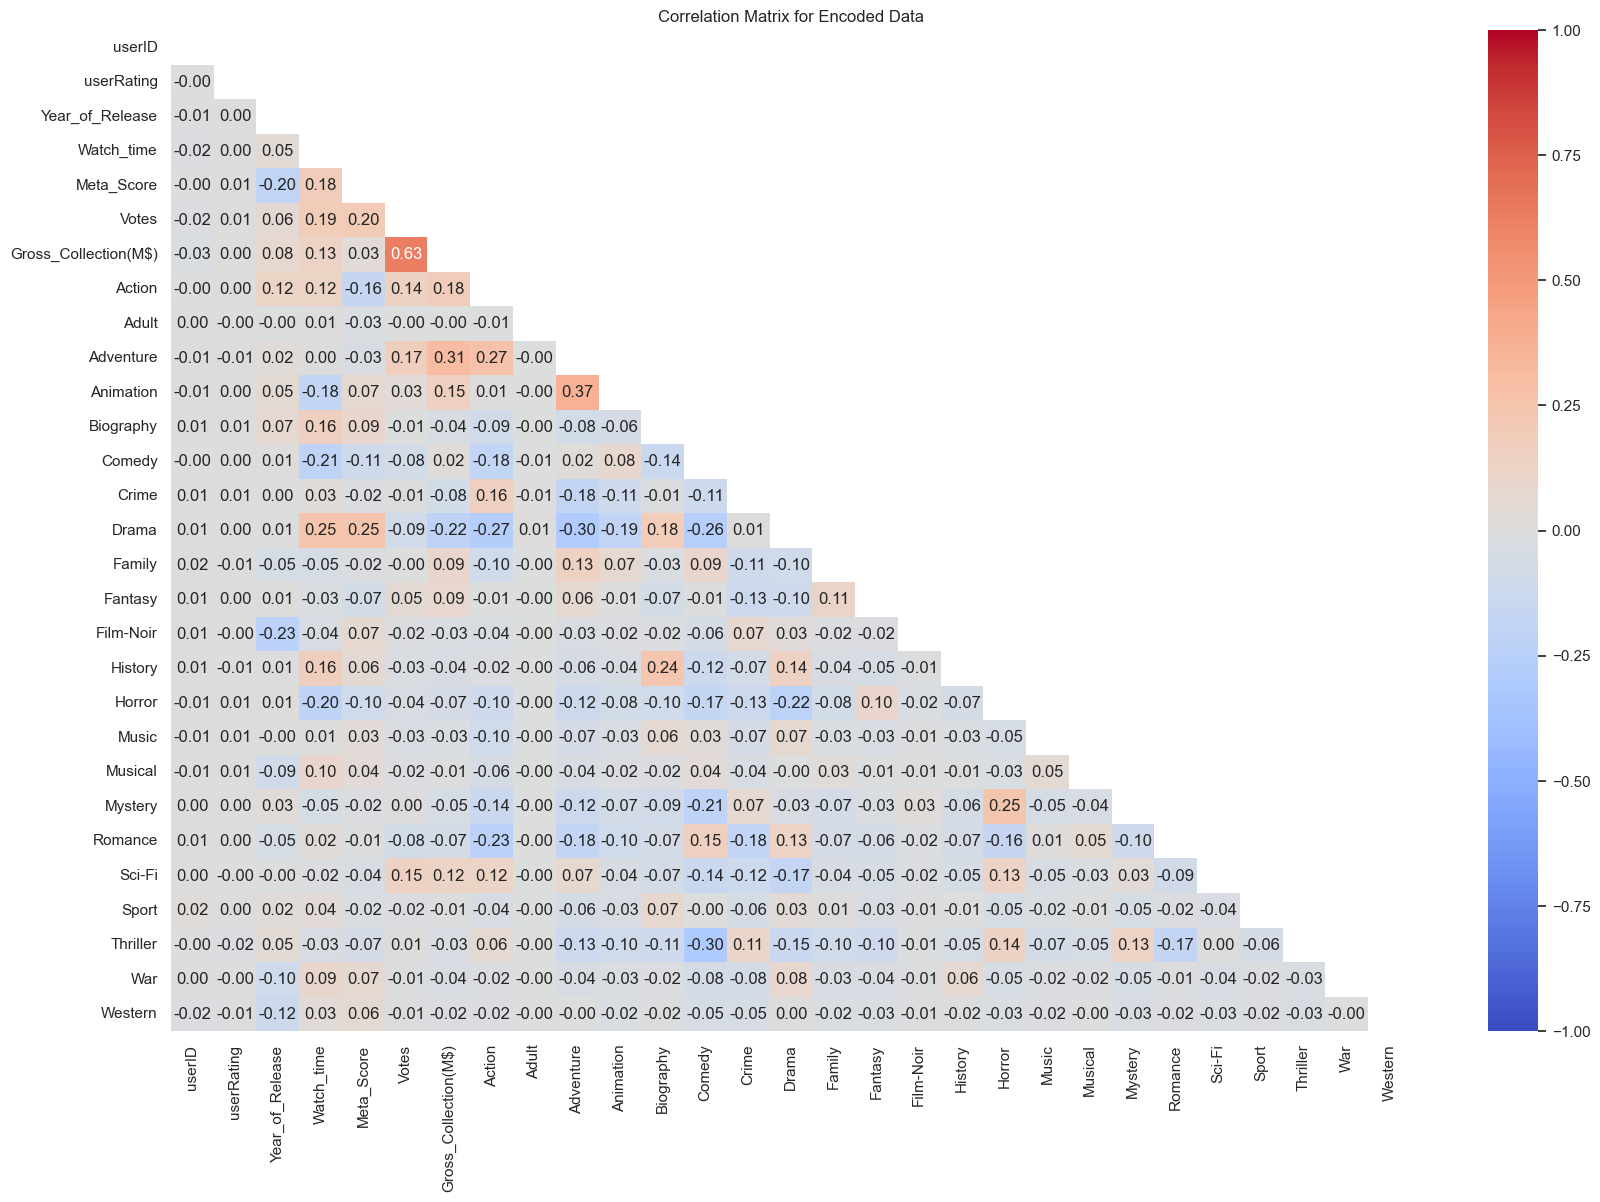

In [109]:
plt.figure(figsize=(20, 13))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Correlation Matrix for Encoded Data')
plt.show()

There are too many rows to process and we can see that most genres have little to no correlation with each other so it's better if we look at only the correlation matrix between the columns of our original dataset.

C:\Users\User\AppData\Local\Temp\ipykernel_16460\851183219.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_new_col = data.corr()


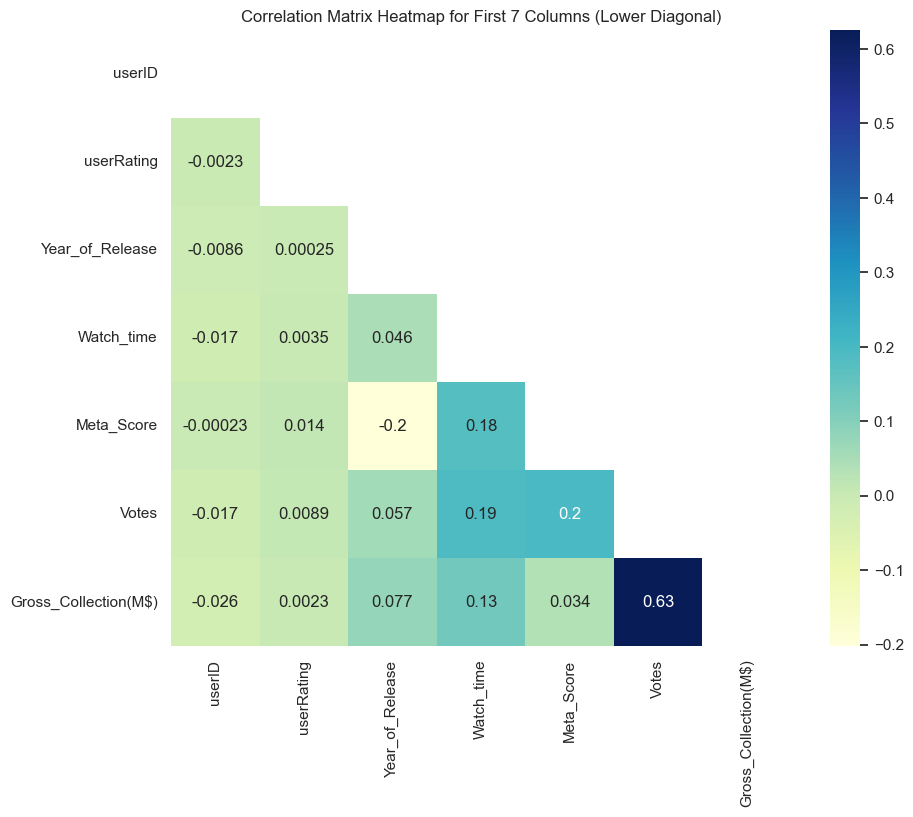

In [261]:
# Select the first 7 columns of the dataframe
cols_to_select = encoded_data.columns[:8]
data = encoded_data[cols_to_select]

# Create the correlation matrix
corr_matrix_new_col = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_new_col, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_new_col, annot=True, cmap="YlGnBu", mask=mask)
plt.title('Correlation Matrix Heatmap for First 7 Columns (Lower Diagonal)')
plt.show()


<h5>
According to the heatmap displayed above, only the the Gross Collection and Votes values have correlation coefficient up to 0.63 and every other correlation coefficients in the array are below 0.35 so according to that, there is no <font color='red'>multi-collinearity</font> between every other features except between Gross_Collection($) and Votes($). But this is only by the heat map, we will try to test for multi-collinearity with other statistical methods. 
</h5>

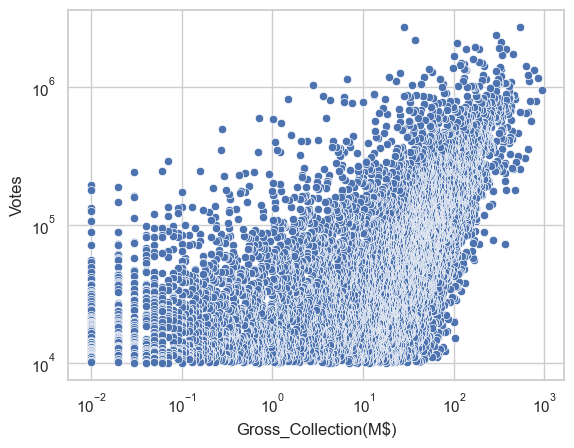

In [262]:
sns.scatterplot(x='Gross_Collection(M$)', y='Votes', data=encoded_data)
plt.xscale('log')
plt.yscale('log')
plt.show()

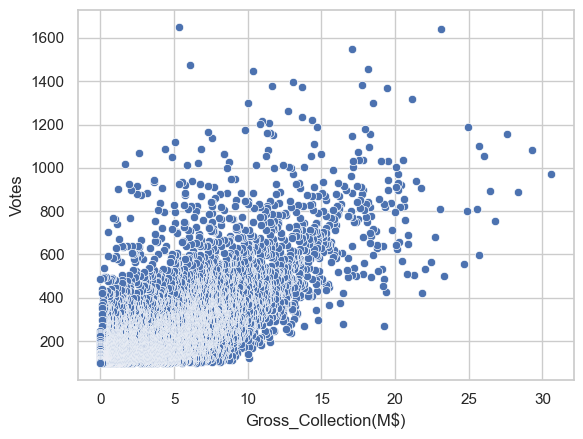

In [263]:
# Plot scatterplot with square root scale
sns.scatterplot(x=np.sqrt(encoded_data['Gross_Collection(M$)']), y=np.sqrt(encoded_data['Votes']))
plt.show()

# <font color='red'>**Watch time and Year of release**</font>

In [16]:
latest_year = encoded_data['Year_of_Release'].max()
print("Latest year:", latest_year)

Latest year: 2023


In [20]:
encoded_data['Watch_time'].max() 

439

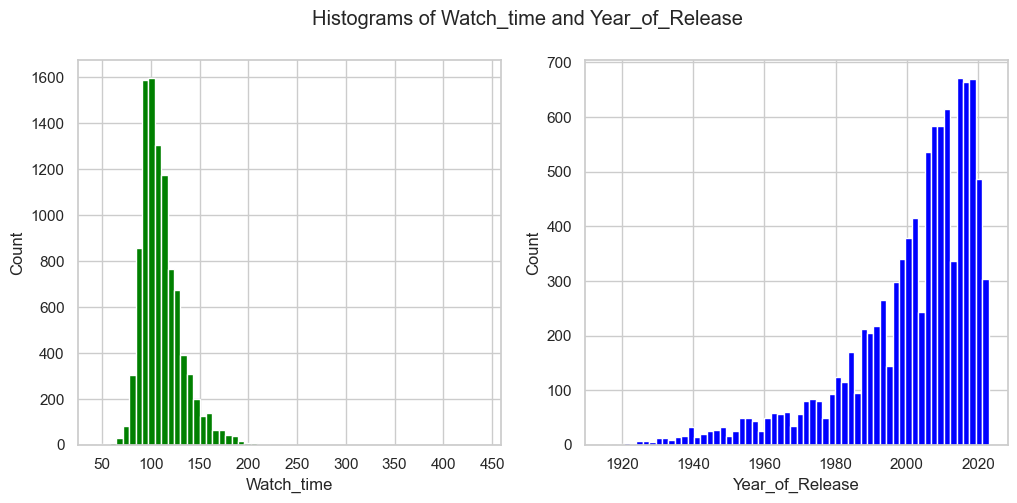

In [260]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# plot histogram of Watch_time on the first subplot
axs[0].hist(encoded_data['Watch_time'], bins=60, color='green')
axs[0].set_xlabel('Watch_time')
axs[0].set_ylabel('Count')

# plot histogram of Year_of_Release on the second subplot
axs[1].hist(encoded_data['Year_of_Release'], bins=60, color='blue')
axs[1].set_xlabel('Year_of_Release')
axs[1].set_ylabel('Count')

# set title for the entire figure
fig.suptitle('Histograms of Watch_time and Year_of_Release')

# show the plot
plt.show()


## **Behavior of people over time**

<h5>In addition, it is interesting to see if the behaviour of people changes over the years. 
Therefore, one other histogram has been made to provide more insight into the number of movies rated over time. As can be obtained in the graphs below, the number of ratings increases over time, with one big outlier somewhere in 2005. An obvious cause for this is that Netflix sampled its data randomly, so that it would protect user privacy. On the right-hand side one sees the average 
ratings over the years. It must be noted that the average rating increases over time. 
Besides, the average rating becomes more stable over time. This can be explained by 
the fact that there are fewer movies rated in the early 2000’s, which causes a higher 
standard deviation in the average rating.</h5>

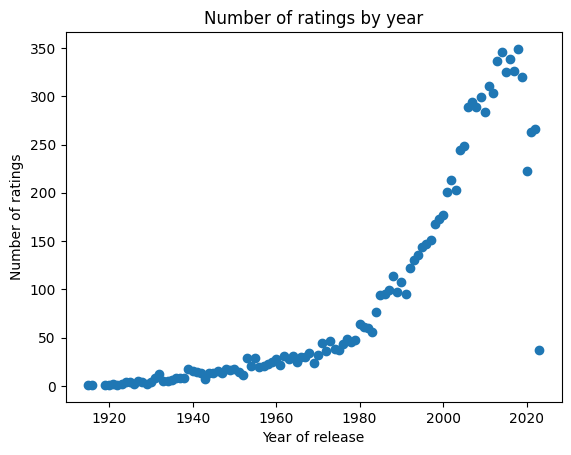

In [5]:
# Group the data by year and count the number of occurrences
ratings_by_year = encoded_data.groupby('Year_of_Release')['userID'].count()

# Create a scatter plot
plt.scatter(ratings_by_year.index, ratings_by_year.values)

# Set the plot title and axis labels
plt.title('Number of ratings by year')
plt.xlabel('Year of release')
plt.ylabel('Number of ratings')

# Show the plot
plt.show()

<h5>It seems that the general trend is positive right from 1920. But there is a small decline in the number of rating from 2020 onwards which is rather odd because Covid-19 hit the world around that time and logically many people would be staying home and watching Netflix.
<br></br>
We believe that the only plausible explanation is that there was an in flux of people watching movies but not many rated the movies. All in all, this is a strange situation, indeed.
</h5>

## Analysis on the genres

Visualizing the frequency of each movie genre using a simple bar chart.

In [111]:
# get the frequency of each genre
genre_count = encoded_data.iloc[:, 8:].sum()
genre_count

Action       2431.0
Adult           1.0
Adventure    1648.0
Animation     478.0
Biography     677.0
Comedy       3596.0
Crime        2058.0
Drama        5751.0
Family        446.0
Fantasy       703.0
Film-Noir      59.0
History       333.0
Horror       1192.0
Music         280.0
Musical       129.0
Mystery      1030.0
Romance      1727.0
Sci-Fi        679.0
Sport         201.0
Thriller     1654.0
War           229.0
Western       117.0
dtype: float64

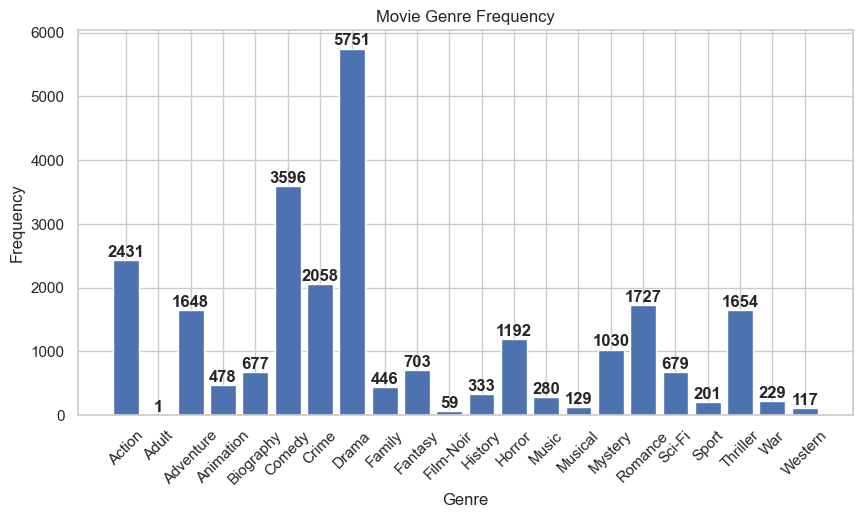

In [112]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(genre_count.index, genre_count.values)

for i, v in enumerate(genre_count):
    ax.text(i, v+50, str(int(v)), ha='center', fontweight='bold')

ax.set_title('Movie Genre Frequency')
ax.set_xlabel('Genre')
ax.set_ylabel('Frequency')



plt.xticks(rotation=45)

plt.show()

**Insight:** From the figure, one can state that the most common genres are Drama, Comedy, Action, and Romance.

### Belows are alternative angles that we can adjust for the above bar chart, but they contain the same amount of information.

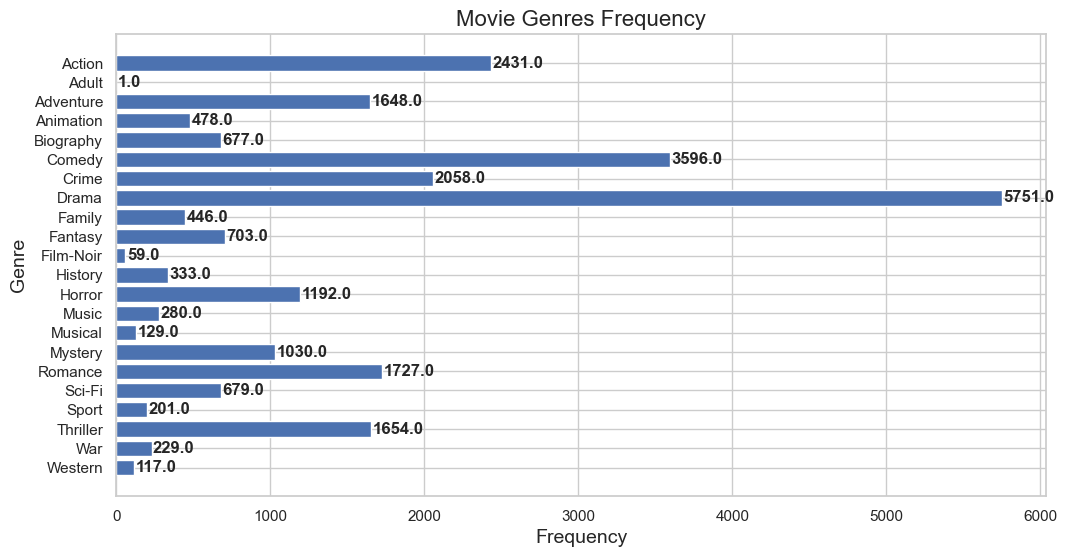

In [113]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,6))

# Create a horizontal bar chart
ax.barh(genre_count.index, genre_count.values)

# Add labels to the bars
for i, v in enumerate(genre_count.values):
    ax.text(v+10, i, str(v), ha='left', va='center', fontweight='bold')

# Set the chart title and labels
ax.set_title('Movie Genres Frequency', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)

# Sort the bars in descending order
ax.invert_yaxis()

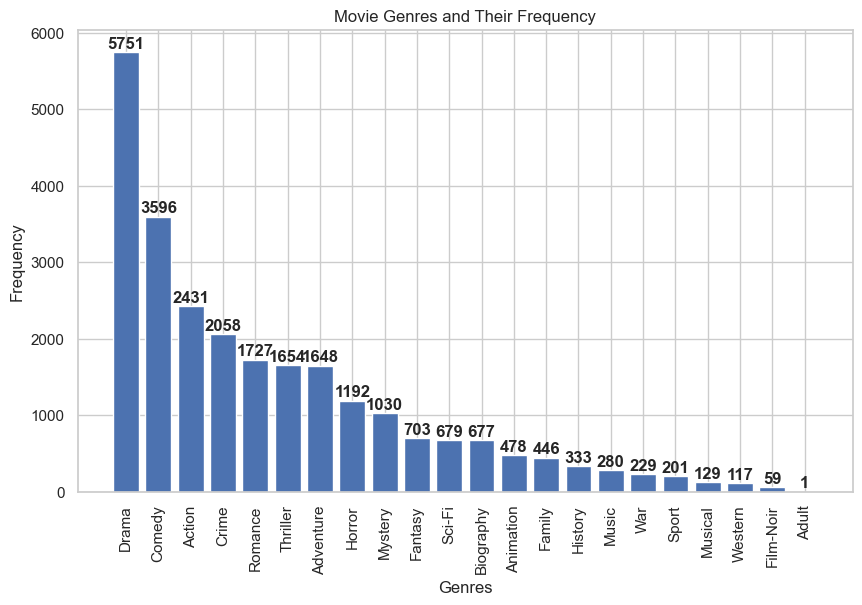

In [114]:
# sort the genres by their counts in descending order
genres = genre_count.index.tolist()
genres.sort(key=lambda x: genre_count[x], reverse=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genres, genre_count[genres])
ax.set_title('Movie Genres and Their Frequency')
ax.set_xlabel('Genres')
ax.set_ylabel('Frequency')


for i, v in enumerate(genre_count[genres]):
    ax.text(i, v+50, str(int(v)), ha='center', fontweight='bold')
    
plt.xticks(rotation=90)
plt.show()


<font color='red'>
++ <b><u>Problems with features in data</u></b>:

- User-based is out of reach for now due to each user only rating a single movie....I believe this is called a cold-start problem but times 1 millions. The Worst challenge that the user-based algorithm has to face...
-
-
-
- Please list any problems here when you find one and try to suggest a remedy below...

</font>


 <font color='green'>  
---> <b>Remedy:</b>   

- (I will try to tackle this with **Gecchai**) we have to rethink about generating the data set again...especially the userRating column and add another column such as time frame or timestamp so we know in the past, a user rates this movie and such and so...



- Remove missing values data
- 
</font>

# <u>**More on EDA**</u>

+ Below are my suggestions for EDA so Gecchai and Phakkorn can think about:
- **Hypothesis testing**: Use statistical tests to test your hypotheses about the data. For example, you can use a t-test to compare the means of two groups/columns. More details: hypothesis testing can help you to determine the significance of the relationship between variables in your dataset. For example, you could use hypothesis testing to determine whether there is a statistically significant relationship between a movie's genre and its gross revenue.
- **Estimation**: Use estimation techniques to estimate population parameters based on the sample data.(**<font color='red'>You guys can skip this one....because of the nature of our data so we will try this after I regenerated the entire dataset</font>**). Here are some more details: For example, we can use estimation techniques to estimate the average rating of a movie in the entire population, based on the ratings given by a sample of users. This could help us identify which movies are generally well-liked by the population, and hence recommend those movies to users who have not seen them. Another example is to estimate the proportion of users who prefer a particular genre of movies. This could help us identify which genres are more popular among the population, and hence recommend more movies from those genres to users. **Furthermore**, we can also use estimation techniques to estimate the parameters of a statistical model, such as a linear regression model, that could help us predict the rating of a movie based on its features. By estimating the parameters of the model using sample data, we can then use the model to make predictions on new data, and hence recommend movies to users based on their predicted ratings.


----> **What I just suggested are quite "statistical"....it will need knowledge from the inferential statistics that we covered in Semester 1.**

## <u>**Hypothesis Testing**</u> <input type="checkbox" id="myCheckbox" style="width: 35px; height: 35px;"> 


$H_0: \mu_1 = \mu_2 = \cdots = \mu_k$ ( The mean gross revenue collection for all movie genres are all equal to each other.)

$H_1:$ At least one $\mu_i$ is different (At least one movie genre has a different mean gross revenue collection than the others.)

Where:
- $H_0$ is the null hypothesis
- $\mu_i$ is the population mean gross collection of genre $i$
- $H_1$ is the alternative hypothesis 
- $k$ is the number of movie genres in the dataset


In [264]:
encoded_data.columns

Index(['userID', 'userRating', 'Name_of_Movie', 'Year_of_Release',
       'Watch_time', 'Meta_Score', 'Votes', 'Gross_Collection(M$)', 'Action',
       'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [265]:
Genre_Columns = encoded_data.columns[8:]
Genre_Columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [266]:
from scipy.stats import f_oneway

In [267]:
def hypothesis_testing(dataframe,c1,c2):
    # Group the data by genre and calculate the mean gross revenue collection for each genre
    grouped_data = dataframe.groupby(c1)[c2].mean()
    # Perform a one-way ANOVA test to determine if there is a significant difference in the mean gross revenue collection between genres
    f_stat, p_value = f_oneway(*[dataframe.loc[encoded_data[c1] == genre, c2] for genre in grouped_data.index])
    return f_stat, p_value

We group the data by genre and calculate the mean gross revenue collection for each genre. Next, we perform a **one-way ANOVA test** using the **<font color='red'>f_oneway()</font>** function from the scipy.stats module to determine if there is a significant difference in the mean gross revenue collection between genres. Finally, we print the results, which include the F-statistic and p-value. The p-value tells us the probability of observing the data if the null hypothesis (that there is no significant difference in the mean gross revenue collection between genres) is true. If the p-value is below a certain significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant difference in the mean gross revenue collection between genres.

**This is an example....**

In [268]:
x = 'Drama'
y = 'Gross_Collection(M$)'

In [269]:
encoded_data.head()

,userID,userRating,Name_of_Movie,Year_of_Release,Watch_time,Meta_Score,Votes,Gross_Collection(M$),Action,Adult,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,4275,5,Some Kind of Beautiful,2014,99,11,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
1,163,2,Run Hide Fight,2020,109,13,47591,16.94,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1400,3,The Accidental Husband,2008,90,14,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
3,8567,3,The Layover,2017,88,15,47591,16.94,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5800,4,Sidney Hall,2017,119,18,47591,16.94,0,0,...,0,0,0,1,1,0,0,0,0,0


In [270]:
encoded_data[x]

0       0
1       1
2       0
3       0
4       1
       ..
9831    1
9832    0
9833    1
9834    1
9835    1
Name: Drama, Length: 9836, dtype: int32

In [271]:
encoded_data[y]

0       16.94
1       16.94
2       16.94
3       16.94
4       16.94
        ...  
9831     0.00
9832     0.00
9833     0.00
9834     0.00
9835     0.00
Name: Gross_Collection(M$), Length: 9836, dtype: float64

In [272]:
grouped_data = encoded_data.groupby(x)[y].mean()
grouped_data.index

Int64Index([0, 1], dtype='int64', name='Drama')

In [273]:
encoded_data.groupby(x)[y].mean()

Drama
0    48.627995
1    23.162382
Name: Gross_Collection(M$), dtype: float64

**We'll run the above function on every genre column against the Gross_Collection(M$) to detect any statistical significance between them**

In [274]:
F_s, P_s = [], {}
 
for genre_i in Genre_Columns:
    F_stats,  P_values = hypothesis_testing(dataframe = encoded_data, c1 = genre_i, c2=y)
    F_s.append(F_stats)
    P_s[genre_i] = P_values

In [275]:
F_s

[327.2269103107354,
 0.05316842987932229,
 1058.16313407037,
 234.81224214142517,
 17.921088602861843,
 3.2118582126793633,
 63.84721201941722,
 478.13104089550694,
 77.24438880594144,
 72.63033612279743,
 7.601714853232313,
 13.956017731539403,
 45.34777799452761,
 7.692902109879952,
 1.9781076760906593,
 22.312361444702965,
 53.00601635464739,
 146.88697516424472,
 0.2756901922627855,
 11.770702828795436,
 12.849242463276527,
 3.710823705594429]

### Although we generated the F_s list which contains a list of F_statistics values...we have not considered why this is necessary....we may come back to this later...



### For now, let's work with the P_values

In [276]:
P_s

{'Action': 5.629765550886604e-72,
 'Adult': 0.817643723919889,
 'Adventure': 1.4984262722187186e-220,
 'Animation': 2.1392303609037253e-52,
 'Biography': 2.3234829484631096e-05,
 'Comedy': 0.07313714285362888,
 'Crime': 1.4954684027617998e-15,
 'Drama': 1.5551683552504035e-103,
 'Family': 1.7634851590824866e-18,
 'Fantasy': 1.7933349710672943e-17,
 'Film-Noir': 0.005842038131749407,
 'History': 0.00018819608508305945,
 'Horror': 1.7419777890748926e-11,
 'Music': 0.005554289805062152,
 'Musical': 0.15962149949529267,
 'Mystery': 2.349186171586003e-06,
 'Romance': 3.5801025601425383e-13,
 'Sci-Fi': 1.4404980642517328e-33,
 'Sport': 0.5995518695611719,
 'Thriller': 0.0006041762480868074,
 'War': 0.00033925090176384456,
 'Western': 0.05408949339317257}

In [277]:
P_value_threshold = 0.05

In [278]:
filtered_less_significant = {key: value for key, value in P_s.items() if value > P_value_threshold}
filtered_less_significant

{'Adult': 0.817643723919889,
 'Comedy': 0.07313714285362888,
 'Musical': 0.15962149949529267,
 'Sport': 0.5995518695611719,
 'Western': 0.05408949339317257}

Let $g_i =$ Genre $i$ where is $i$ is the index of the key of the above dictionary,i.e., $i \in \{0,1,2,3,4\}$ then $\forall i \in \{0,1,2,3,4\},$ the $p-value$ of $g_i$ is greater than $0.05$.

Thus, we fail to reject the null hypothesis $H_0$ and cannot conclude that the mean gross revenue collection of the $g_i$ genre is significantly different from the mean gross revenue collection of all other genres.

In other words, we do not have enough evidence to suggest that the $g_i$ has a different mean gross revenue collection than the other genres in the dataset. It does not mean that the mean gross revenue collection of $g_i$ is equal to the mean gross revenue collection of all other genres, but only that we do not have enough evidence to reject the null hypothesis.

##### We will filter the **P_s** list such that the new list only contains p_values that are less than the **P_value_threshold**. So we know that in such a case, we reject the null hypothesis, i.e, we reject $H_0: \mu_1 = \mu_2 = \cdots = \mu_k$, if we reject the null hypothesis, it means that at least one movie genre has a statistically significant effect on gross collection. In our case, it would mean that there is a significant difference in gross collection between at least two movie genres. However, we would need to perform further analysis (such as post-hoc tests) to determine which specific genres are significant.

In [279]:
filtered_Ps = {key: value for key, value in P_s.items() if value < P_value_threshold}
filtered_Ps

{'Action': 5.629765550886604e-72,
 'Adventure': 1.4984262722187186e-220,
 'Animation': 2.1392303609037253e-52,
 'Biography': 2.3234829484631096e-05,
 'Crime': 1.4954684027617998e-15,
 'Drama': 1.5551683552504035e-103,
 'Family': 1.7634851590824866e-18,
 'Fantasy': 1.7933349710672943e-17,
 'Film-Noir': 0.005842038131749407,
 'History': 0.00018819608508305945,
 'Horror': 1.7419777890748926e-11,
 'Music': 0.005554289805062152,
 'Mystery': 2.349186171586003e-06,
 'Romance': 3.5801025601425383e-13,
 'Sci-Fi': 1.4404980642517328e-33,
 'Thriller': 0.0006041762480868074,
 'War': 0.00033925090176384456}

## **Sort the hash table in ascending order**

In [280]:
def heap_sort_dict(dictionary):
    # Convert the dictionary into a list of tuples
    lst = list(dictionary.items())
    n = len(lst)

    # Build a max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(lst, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        lst[0], lst[i] = lst[i], lst[0]
        heapify(lst, i, 0)

    # Convert the sorted list back into a dictionary
    sorted_dict = dict(lst)
    return sorted_dict

def heapify(lst, n, i):
    # Heapify subtree rooted at index i
    largest = i  # Initialize largest as root
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and lst[left][1] > lst[largest][1]:
        largest = left

    if right < n and lst[right][1] > lst[largest][1]:
        largest = right

    if largest != i:
        lst[i], lst[largest] = lst[largest], lst[i]
        heapify(lst, n, largest)


In [281]:
N = len(filtered_Ps)
filtered_Ps

{'Action': 5.629765550886604e-72,
 'Adventure': 1.4984262722187186e-220,
 'Animation': 2.1392303609037253e-52,
 'Biography': 2.3234829484631096e-05,
 'Crime': 1.4954684027617998e-15,
 'Drama': 1.5551683552504035e-103,
 'Family': 1.7634851590824866e-18,
 'Fantasy': 1.7933349710672943e-17,
 'Film-Noir': 0.005842038131749407,
 'History': 0.00018819608508305945,
 'Horror': 1.7419777890748926e-11,
 'Music': 0.005554289805062152,
 'Mystery': 2.349186171586003e-06,
 'Romance': 3.5801025601425383e-13,
 'Sci-Fi': 1.4404980642517328e-33,
 'Thriller': 0.0006041762480868074,
 'War': 0.00033925090176384456}

In [282]:
X = heap_sort_dict(filtered_Ps)
X

{'Adventure': 1.4984262722187186e-220,
 'Drama': 1.5551683552504035e-103,
 'Action': 5.629765550886604e-72,
 'Animation': 2.1392303609037253e-52,
 'Sci-Fi': 1.4404980642517328e-33,
 'Family': 1.7634851590824866e-18,
 'Fantasy': 1.7933349710672943e-17,
 'Crime': 1.4954684027617998e-15,
 'Romance': 3.5801025601425383e-13,
 'Horror': 1.7419777890748926e-11,
 'Mystery': 2.349186171586003e-06,
 'Biography': 2.3234829484631096e-05,
 'History': 0.00018819608508305945,
 'War': 0.00033925090176384456,
 'Thriller': 0.0006041762480868074,
 'Music': 0.005554289805062152,
 'Film-Noir': 0.005842038131749407}


<font color='red'>
<h5>If the hypothesis testing and ANOVA reveal that certain movie genres are statistically significant with gross collection, it means that there is a significant association between those movie genres and the revenue generated by the movie. This information can be useful for movie studios, producers, and investors in making decisions about which genres to invest in and produce. For example, if action movies are found to be significantly associated with higher gross collection, a movie studio might decide to invest more resources into producing action movies in the future. On the other hand, if a particular genre is found to have a negative association with gross collection, the studio might decide to reduce investments in that genre.</h5>

### <u>Difference between association and correlation</u>

<h5>
Association and correlation are related concepts, but they are not exactly the same. Association refers to the degree to which two variables are related or connected in some way. Correlation, on the other hand, refers specifically to the strength and direction of the relationship between two variables. 

In other words, association is a broader concept that can refer to any type of relationship between two variables, while correlation specifically measures the extent to which the relationship between two variables can be described by a linear equation. Additionally, correlation requires both variables to be continuous, while association can be measured for any type of variable, including categorical variables.</h5>
</font>

**<font color='yellow'>Based on the updated dictionary, all of the genres have p-values less than 0.05, which means they are all statistically significant. This suggests that each genre is associated with the revenue generated by a movie. However, some genres have much smaller p-values than others, indicating a stronger association. The genres with the smallest p-values (i.e., the most significant associations) are Action, Adventure, Animation, .... War. The genres with larger p-values (i.e., less significant associations) are Adult, Comedy, Musical, Sport, and Western.</font>**